## **`TP2`**

Trabajaremos con el dataset(E-Commerce_train.xls). Importo las librarias que preciso para un analisis preliminar del dataset.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
data = pd.read_excel('E-Commerce_train.xlsx', index_col=0)

In [293]:
data.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [294]:
data.shape

(8999, 11)

Verificamos si tenemos instancias duplicadas:

In [127]:
data[data.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,


No hay duplicadas, ahora buscamos gráficamente los valores nulos / faltantes:

In [128]:
import missingno as msno

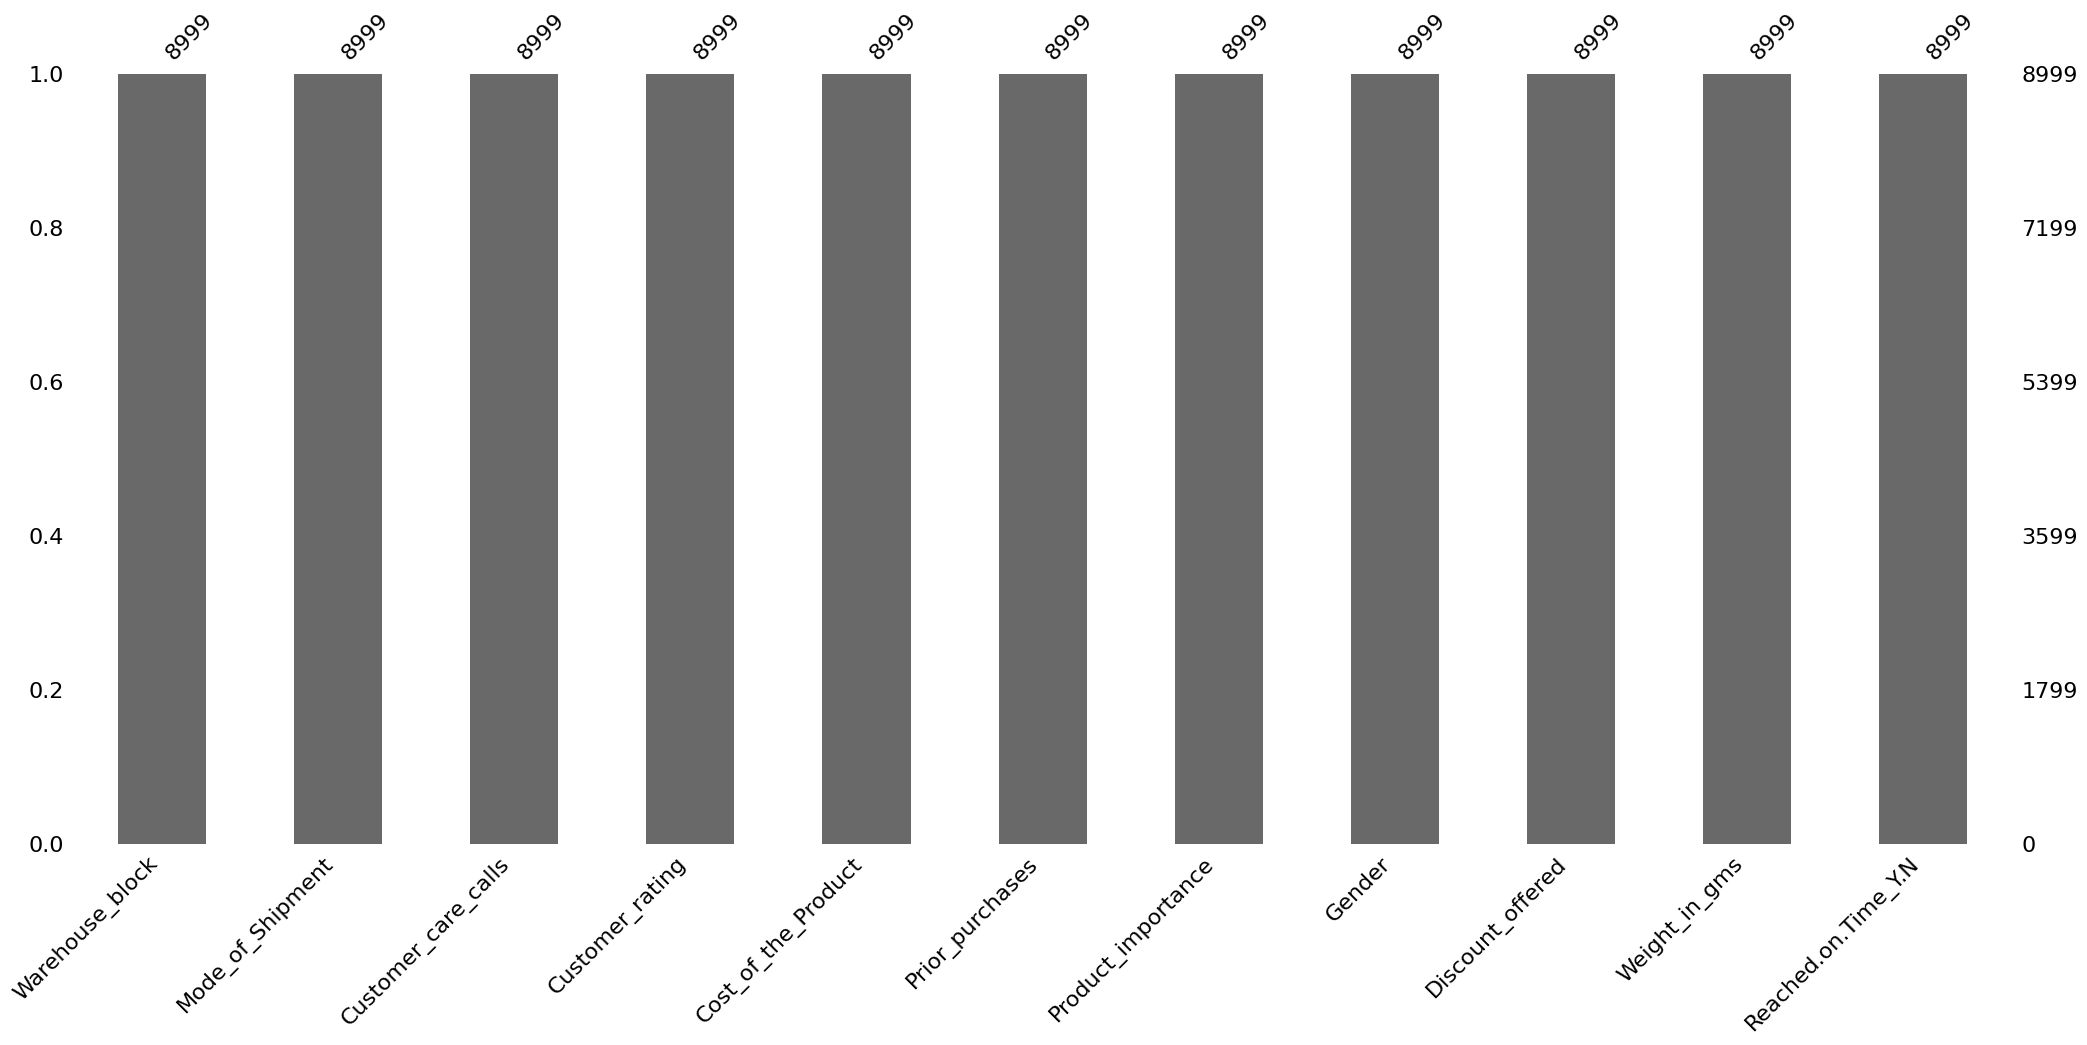

In [129]:
msno.bar(data)
plt.show()

No hay faltantes. Ahora busco valores atipicos (outliers):

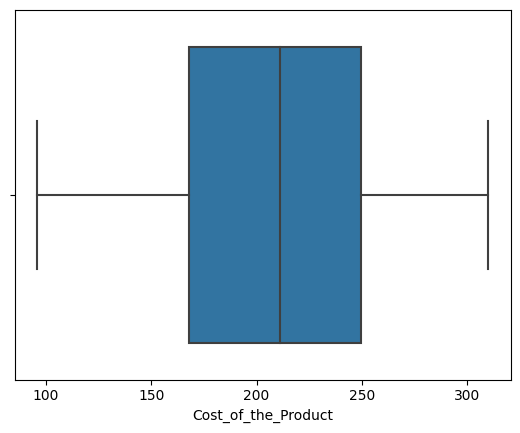

In [130]:
sns.boxplot(x = 'Cost_of_the_Product', data = data)
plt.show()

No hay atipicos en Costo del Producto, sigo buscando en otras variables:

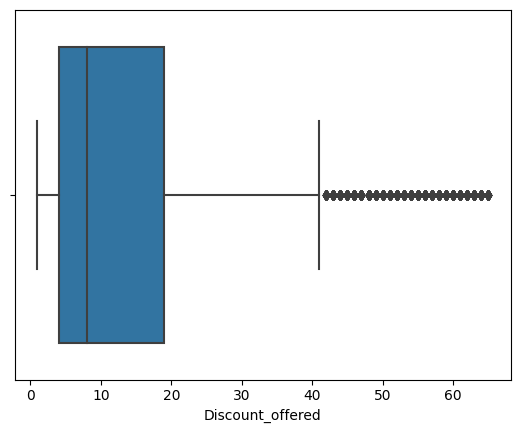

In [131]:
sns.boxplot(x = 'Discount_offered', data = data)
plt.show()

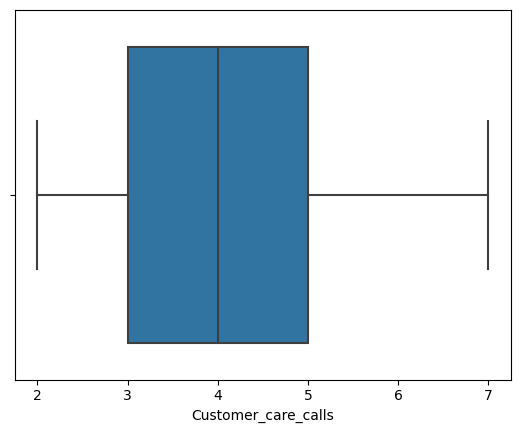

In [62]:
sns.boxplot(x = 'Customer_care_calls', data = data)
plt.show()

*Aparenta que la columna de descuento tiene otuliers, utilizo la tecnica del rango intercuartiles, pero solo para la parte superior al 75%, Ya que tiene logica descuentos en el primer cuartil:

In [222]:
Q1 = data['Discount_offered'].quantile(0.00)
Q3 = data['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1.0
19.0
18.0
-26.0
46.0


In [295]:
print('Cantidad de registros totales:', data.shape[0])
print('Cantidad de outliers:', data[(data['Discount_offered']<BI) | (data['Discount_offered']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 938


De este analisis, se desprende que podriamos elimiar los 938 registros con descuento mayor a 46% pero... si eliminamos los outliers, podriamos perder info que no sabemos a priori si esta corralacionada con las demoras en la entrega y ademas el enunciado dice hasta 65%

In [133]:
print(np.where(data['Discount_offered']>65))

(array([], dtype=int64),)


No hay ninguno mayor a 65. Asi que no elimino ningun dato.

In [296]:
# Veamos si conviene Normalizar los datos, Probamos el método StandardScaler

from sklearn.preprocessing import StandardScaler

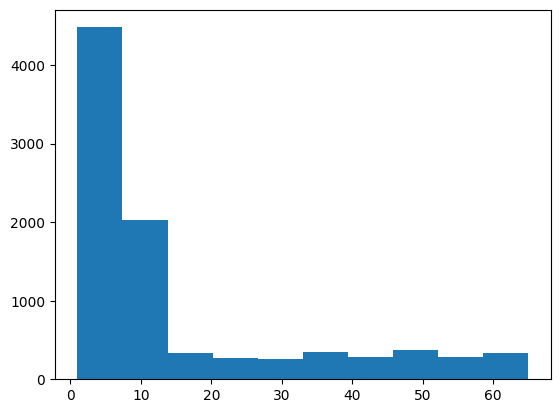

In [297]:
# Trabajaremos con la variable Dicount, veamos su distribución

plt.hist(data['Discount_offered']) 
plt.show()

No tiene sentido aplicarle normalizacion a estos valores, se va a mantener la distribucion con valores entre -0.75 y 2.75

In [298]:
# Calculo media de las variables numericas con respecto a la ultima columna (llego a tiempo)

data.groupby('Reached.on.Time_Y.N').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,
0,4.123780,2.974390,213.883537,3.609146,5.532012,4281.294817
1,3.952789,3.006819,205.509180,3.455499,20.583843,3184.656408


In [299]:
data.groupby('Discount_offered').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Weight_in_gms,Reached.on.Time_Y.N
Discount_offered,,,,,,
1,4.078247,2.956182,212.403756,3.539906,4126.757433,0.494523
2,4.157975,3.058282,215.262270,3.533742,4012.980061,0.509202
3,4.110420,2.979782,215.143079,3.608087,4039.009331,0.486781
4,4.072785,2.925633,212.058544,3.503165,4135.813291,0.473101
5,4.120579,2.993569,212.313505,3.657556,4184.430868,0.495177
...,...,...,...,...,...,...
61,3.924528,2.830189,204.981132,3.547170,2371.962264,1.000000
62,3.734694,3.142857,200.734694,3.591837,2401.571429,1.000000
63,3.698113,2.754717,196.245283,3.433962,2145.415094,1.000000


Aparenta haber alguna relacion entre el Descuento aplicado y el plazo de entrega. Voy a graficar.

In [300]:
# Renombramos para sacar los puntos de la columna llego a tiempo:
data=data.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1)

<AxesSubplot: xlabel='Discount_offered'>

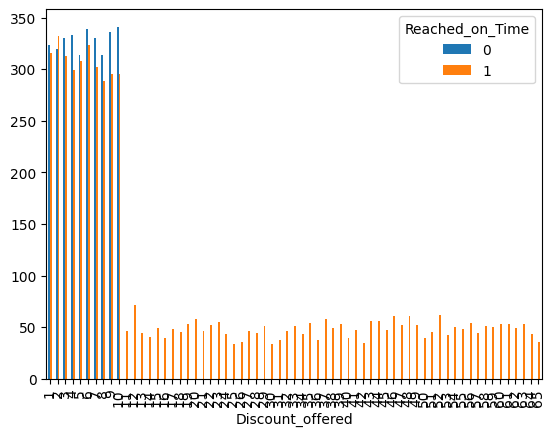

In [301]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(data.Discount_offered, data.Reached_on_Time).plot(kind='bar')

Se evidencia que cuando el descuento es mayor a 10, llegaron todos los envios (salida 1) y los que tienen descuento de 10 o menos, algunos llegaron y otros no.

Codificacion de variables categoricas: Hay 4 columas para codificar una variable nominal:

In [149]:
print(data.iloc[:,[0,1,6,7]])

     Warehouse_block Mode_of_Shipment Product_importance Gender
ID                                                             
1                  D           Flight                low      F
2                  F           Flight                low      M
3                  A           Flight                low      M
4                  B           Flight             medium      M
5                  C           Flight             medium      F
...              ...              ...                ...    ...
8995               D             Ship                low      F
8996               F             Ship             medium      M
8997               A             Ship             medium      F
8998               B             Ship             medium      F
8999               C             Ship                low      M

[8999 rows x 4 columns]


In [69]:
# Veamos la cantidad por cada columna:

data.Warehouse_block.unique()


array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [70]:
data.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [71]:
data.Mode_of_Shipment.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [72]:
data.Product_importance.unique()

array(['low', 'medium', 'high'], dtype=object)

In [302]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])
data["Warehouse_block"]= label_encoder.fit_transform(data['Warehouse_block'])
data['Mode_of_Shipment']=label_encoder.fit_transform(data['Mode_of_Shipment'])
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [303]:
data['Product_importance'].value_counts()

1    4308
2    3858
0     833
Name: Product_importance, dtype: int64

In [304]:
# Observamos cómo cambió todos los valores por 0 para High, 1 para Low y 2 para medium.

data['Product_importance']

ID
1       1
2       1
3       1
4       2
5       2
       ..
8995    1
8996    2
8997    2
8998    2
8999    1
Name: Product_importance, Length: 8999, dtype: int32

In [232]:
# Observamos cómo cambió todos los valores por 0=A, 1=B, 2=C 3=D, 4=F

data['Warehouse_block']

ID
1       3
2       4
3       0
4       1
5       2
       ..
8995    3
8996    4
8997    0
8998    1
8999    2
Name: Warehouse_block, Length: 8999, dtype: int32

In [233]:
# Observamos cómo cambió todos los valores por 0 para Flight, 1 para Road  y 2 para Ship.

data['Mode_of_Shipment']

ID
1       0
2       0
3       0
4       0
5       0
       ..
8995    2
8996    2
8997    2
8998    2
8999    2
Name: Mode_of_Shipment, Length: 8999, dtype: int32

In [234]:
# En Gender quedo 0=Femenino 1=Masculino
data['Gender']

ID
1       0
2       1
3       1
4       1
5       0
       ..
8995    0
8996    1
8997    0
8998    0
8999    1
Name: Gender, Length: 8999, dtype: int32

Asi queda el dataset de entrenamiento, con las variables categoricas alfanumericas transformadas a numericas:

In [305]:
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
ID,,,,,,,,,,,
1,3,0,4,2,177,3,1,0,44,1233,1
2,4,0,4,5,216,2,1,1,59,3088,1
3,0,0,2,2,183,4,1,1,48,3374,1
4,1,0,3,3,176,4,2,1,10,1177,1
5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
8995,3,2,3,1,217,3,1,0,1,4177,1
8996,4,2,5,3,232,3,2,1,3,4526,0
8997,0,2,4,5,260,3,2,0,6,4221,0


In [306]:
# Voy a verificar si esta balanceado el valor a predecir Reached_on_Time
data['Reached_on_Time'].value_counts()

1    5719
0    3280
Name: Reached_on_Time, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

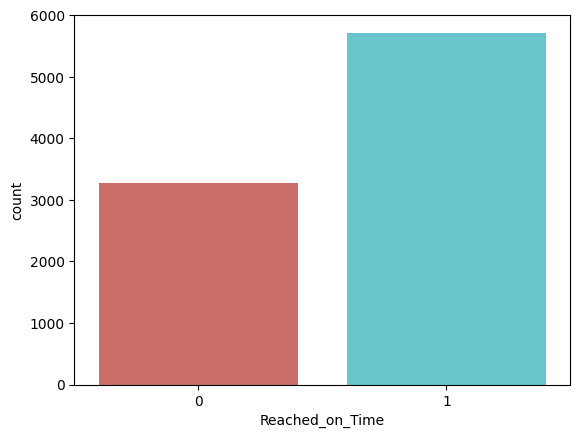

In [307]:
sns.countplot(x='Reached_on_Time', data=data, palette='hls')
plt.show

Se evidencia un desbalanceo y si entrenamos el algoritmo va a haber una tendencia a predecir 1(Que llegara a tiempo) por sobre el 0 (no llegara a tiempo).  

Vamos a Balancearlo para luego analizar los modelos de regresion, con la tecnica over/up sampling tomaremos en forma aleatoria datos que contenan igual cantidad de 0 y 1 para la salida Reached_on_Time. Usando la libraria imbalanced-learned

In [308]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
X=data.loc[:,data.columns != 'Reached_on_Time']
y=data.loc[:,data.columns == 'Reached_on_Time']
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split (X ,y , test_size=0.3, random_state=0)
columns=X_train.columns
os_data_X, os_data_y = os.fit_resample (X_train, y_train)
os_data_X=pd.DataFrame(data=os_data_X, columns=columns)
os_data_y=pd.DataFrame(data=os_data_y, columns=['Reached_on_Time'])
#Aca verificamos los datos de nuestra data
print ('Tamanio original del dataset', len(data))
print ('Tamanio del upsampled dataset' , len(os_data_X) )
print ('No llegaron a tiempo en el upsampled data es', len (os_data_y[os_data_y["Reached_on_Time"]==0]))
print ('Si llegaron a tiempo en el upsampled  data es', len (os_data_y[os_data_y["Reached_on_Time"]==1]))


Tamanio original del dataset 8999
Tamanio del upsampled dataset 8004
No llegaron a tiempo en el upsampled data es 4002
Si llegaron a tiempo en el upsampled  data es 4002


Ahora el upsampled dataset esta balanceado para entrenar al modelo, lo verificamos graficamente:

<function matplotlib.pyplot.show(close=None, block=None)>

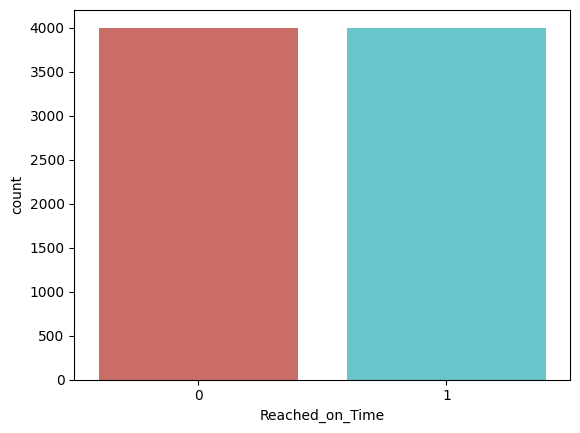

In [309]:
sns.countplot(x='Reached_on_Time', data=os_data_y, palette='hls')
plt.show

In [310]:
os_data_X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,2,3,2,198,3,1,1,15,3250
1,2,2,5,2,188,3,2,0,50,3992
2,3,0,3,5,168,5,2,1,9,5731
3,0,2,5,4,215,2,1,0,1,5669
4,4,2,5,5,262,2,2,0,62,3744
...,...,...,...,...,...,...,...,...,...,...
7999,1,0,3,3,150,4,1,1,4,4405
8000,2,2,3,2,166,2,1,1,1,5747
8001,1,0,3,1,156,2,1,0,6,5227
8002,3,1,4,3,265,3,1,0,3,5903


Importamos el primer modelo y entrenamos:

In [311]:
# Saco la columna Gender que no esta relacionado con el tiempo de entrega
os_data_X=os_data_X.drop(["Gender"], axis=1)


In [312]:
os_data_X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,1,2,3,2,198,3,1,15,3250
1,2,2,5,2,188,3,2,50,3992
2,3,0,3,5,168,5,2,9,5731
3,0,2,5,4,215,2,1,1,5669
4,4,2,5,5,262,2,2,62,3744
...,...,...,...,...,...,...,...,...,...
7999,1,0,3,3,150,4,1,4,4405
8000,2,2,3,2,166,2,1,1,5747
8001,1,0,3,1,156,2,1,6,5227
8002,3,1,4,3,265,3,1,3,5903


In [313]:
from sklearn.linear_model import LogisticRegression
modelo1=LogisticRegression()
modelo1.fit(os_data_X,os_data_y)

LogisticRegression()

In [314]:
# Importamos una métrica utilizada para evaluar modelos de clasificación. 
from sklearn.metrics import accuracy_score 
# Predecimos sobre el dataset de entrenamiento balanceado
y_pred = modelo1.predict(os_data_X)
# Evaluamos
print('El score del modelo es:', accuracy_score(os_data_y, y_pred))

El score del modelo es: 0.7268865567216392


In [315]:
from sklearn.metrics import recall_score
precision = recall_score(os_data_y , y_pred, average= None)
print("El Recall score es" , precision)

El Recall score es [0.86606697 0.58770615]


Vamos a importar el dataset de prueba y le hacemos los mismos cambios

In [316]:
data_test = pd.read_excel('E-Commerce_test.xlsx', index_col=0)

In [317]:
data_test=data_test.drop(["Gender"], axis=1)

In [318]:
data_test.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
ID,,,,,,,,,
9000,F,Ship,5,1,189,2,medium,10,5248
9001,D,Ship,5,3,150,2,high,9,4446
9002,F,Ship,3,3,200,3,low,3,5739
9003,A,Ship,5,1,133,2,medium,1,4643
9004,B,Ship,4,2,260,3,low,4,5504


In [319]:
label_encoder = preprocessing.LabelEncoder()

data_test['Product_importance'] = label_encoder.fit_transform(data_test['Product_importance'])
data_test["Warehouse_block"]= label_encoder.fit_transform(data_test['Warehouse_block'])
data_test['Mode_of_Shipment']=label_encoder.fit_transform(data_test['Mode_of_Shipment'])


In [320]:
data_test.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
ID,,,,,,,,,
9000,4,2,5,1,189,2,2,10,5248
9001,3,2,5,3,150,2,0,9,4446
9002,4,2,3,3,200,3,1,3,5739
9003,0,2,5,1,133,2,2,1,4643
9004,1,2,4,2,260,3,1,4,5504


Ahora aplicamos el modelo al dataset de test:

In [321]:
# Predecimos sobre el dataset de test 
y_pred_test = modelo1.predict(data_test)
# No tenemos contra que evaluarlo para calcular el score


In [334]:
y_pred_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [337]:
np.savetxt("mav.csv", y_pred_test, delimiter=",", fmt = '%10.5f')